# 📊 Análisis Comparativo PAES 2022-2025 - Estrategias Pedagógicas en Matemáticas

**Objetivo:** Evaluar el impacto de las estrategias pedagógicas comparando resultados históricos PAES oficiales (2022-2025) y ensayos internos (2024-2025).

**Datos:**
- Resultados oficiales PAES Matemática (2022-2025)
- Ensayos internos 2024 y 2025 (3°A, 3°B, 4°A, 4°B)

**Herramientas:** Python, Pandas, Matplotlib, Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='whitegrid', palette='muted')
print('✅ Librerías cargadas correctamente')

✅ Librerías cargadas correctamente


## 📂 Carga de Datos

In [3]:
# Cargar datos oficiales PAES
df_oficial = pd.read_excel(r"C:\Users\felip\Desktop\anilisis colegio\PAESOFICIAL.xlsx")
df_oficial.columns = df_oficial.columns.str.strip()
df_oficial = df_oficial.dropna(subset=['M1'])

# Cargar ensayos internos 2024 y 2025
df_ensayos = pd.read_excel(r"C:\Users\felip\Desktop\anilisis colegio\PAESINTERNO.xlsx")
df_ensayos.columns = df_ensayos.columns.str.strip()

print('✅ Datos cargados correctamente')
print(f'📋 Puntajes oficiales: {df_oficial.shape[0]} registros ({df_oficial["AÑO"].min()}-{df_oficial["AÑO"].max()})')
print(f'📋 Ensayos internos: {df_ensayos.shape[0]} estudiantes ({df_ensayos["Año"].min()}-{df_ensayos["Año"].max()})')
print(f'\nDistribución ensayos por año y curso:')
display(df_ensayos.groupby(['Año','Curso']).size().reset_index(name='Estudiantes'))

✅ Datos cargados correctamente
📋 Puntajes oficiales: 181 registros (2022-2025)
📋 Ensayos internos: 252 estudiantes (2024-2025)

Distribución ensayos por año y curso:


,Año,Curso,Estudiantes
0,2024,3A,19
1,2024,3B,26
2,2024,4A,37
3,2024,4B,34
4,2025,3A,39
5,2025,3B,36
6,2025,4A,31
7,2025,4B,30


## 📈 Evolución Histórica PAES Oficial (2022-2025)

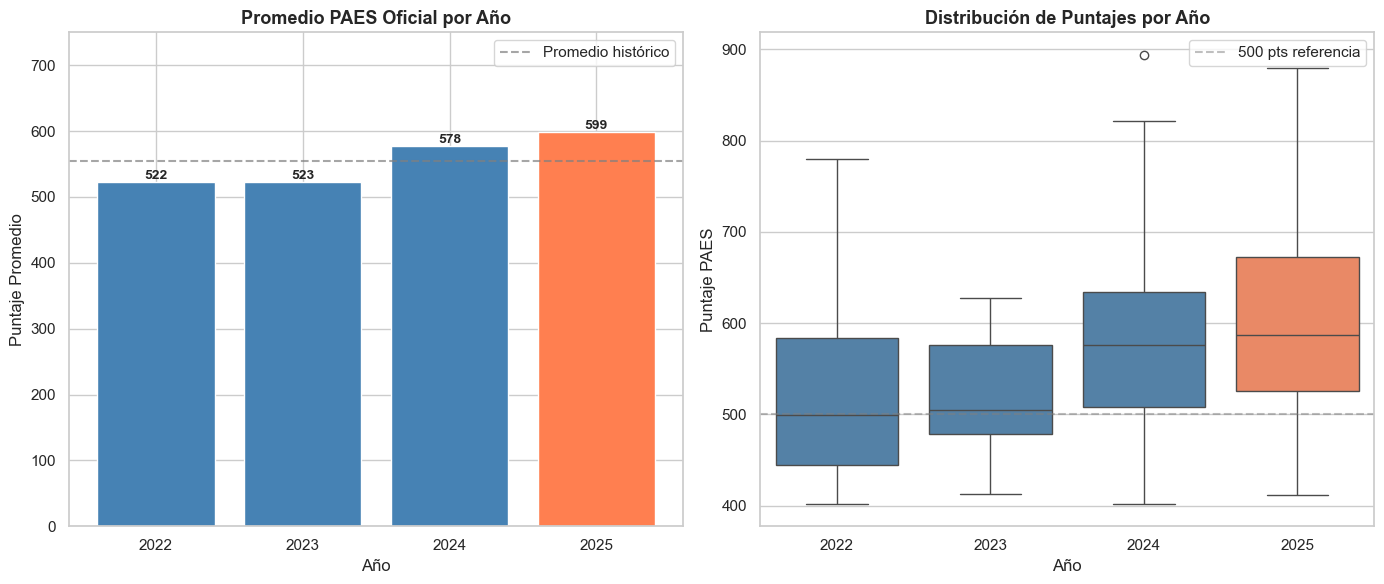


Resumen estadístico:


,Año,Promedio,Mínimo,Máximo,Desv. Estándar
0,2022,522.2,402.0,780.0,85.6
1,2023,522.9,413.0,628.0,63.8
2,2024,577.5,402.0,894.0,103.1
3,2025,598.7,412.0,880.0,115.1


In [4]:
resumen = df_oficial.groupby('AÑO')['M1'].agg(['mean','min','max','std']).round(1).reset_index()
resumen.columns = ['Año','Promedio','Mínimo','Máximo','Desv. Estándar']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colores = ['steelblue' if a != 2025 else 'coral' for a in resumen['Año']]
bars = axes[0].bar(resumen['Año'].astype(str), resumen['Promedio'], color=colores)
axes[0].axhline(resumen['Promedio'].mean(), color='gray', linestyle='--', alpha=0.7, label='Promedio histórico')
for i, row in resumen.iterrows():
    axes[0].text(i, row['Promedio'] + 5, f"{row['Promedio']:.0f}", ha='center', fontsize=10, fontweight='bold')
axes[0].set_title('Promedio PAES Oficial por Año', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Puntaje Promedio')
axes[0].set_ylim(0, 750)
axes[0].legend()

sns.boxplot(data=df_oficial, x='AÑO', y='M1', ax=axes[1], hue='AÑO', legend=False, palette={2022:'steelblue',2023:'steelblue',2024:'steelblue',2025:'coral'})
axes[1].axhline(500, color='gray', linestyle='--', alpha=0.5, label='500 pts referencia')
axes[1].set_title('Distribución de Puntajes por Año', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Puntaje PAES')
axes[1].legend()

plt.tight_layout()
plt.show()
print('\nResumen estadístico:')
display(resumen)

## 📊 Evolución de Ensayos Internos (2024 vs 2025)

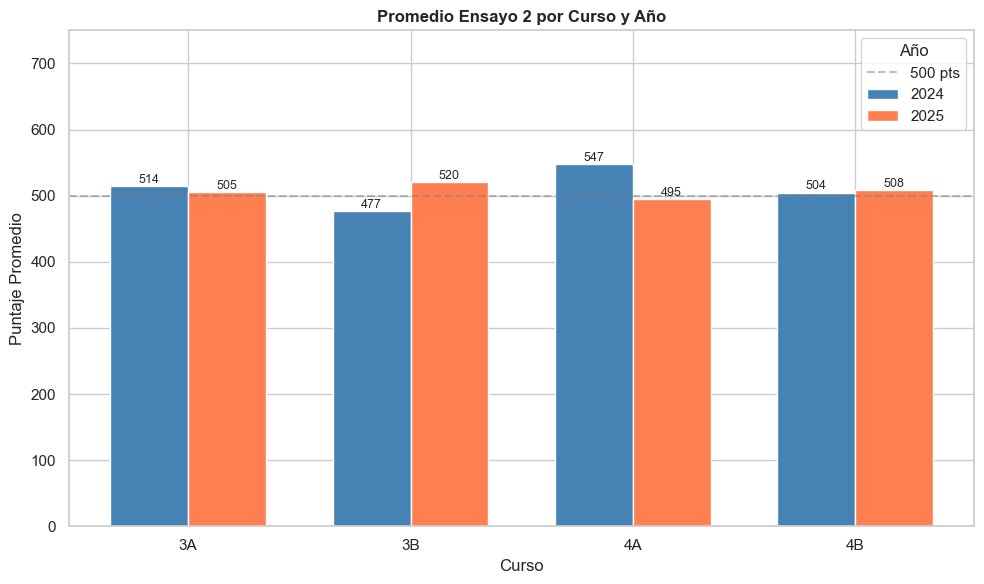

In [12]:
resumen_ensayos = df_ensayos.groupby(['Año','Curso'])[['Ensayo1','Ensayo2']].mean().round(1).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(4)
cursos = ['3A', '3B', '4A', '4B']
width = 0.35

datos_2024 = resumen_ensayos[resumen_ensayos['Año']==2024].set_index('Curso')['Ensayo2'].reindex(cursos)
datos_2025 = resumen_ensayos[resumen_ensayos['Año']==2025].set_index('Curso')['Ensayo2'].reindex(cursos)

bars1 = ax.bar(x - width/2, datos_2024, width, label='2024', color='steelblue')
bars2 = ax.bar(x + width/2, datos_2025, width, label='2025', color='coral')

for bar in bars1:
    if bar.get_height() > 0:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{bar.get_height():.0f}', ha='center', fontsize=9)
for bar in bars2:
    if bar.get_height() > 0:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{bar.get_height():.0f}', ha='center', fontsize=9)

ax.axhline(500, color='gray', linestyle='--', alpha=0.5, label='500 pts')
ax.set_title('Promedio Ensayo 2 por Curso y Año', fontweight='bold')
ax.set_xlabel('Curso')
ax.set_ylabel('Puntaje Promedio')
ax.set_xticks(x)
ax.set_xticklabels(cursos)
ax.set_ylim(0, 750)
ax.legend(title='Año')
plt.tight_layout()
plt.show()

## 🔍 Comparación: Ensayos Internos vs Resultado Oficial

> Solo se compara 4° medio ya que son quienes rinden la PAES oficial.


📊 Año 2024 - 4° Medio:
   Ensayo 1: 374.9 | Ensayo 2: 525.9 | PAES Oficial: 577.5

📊 Año 2025 - 4° Medio:
   Ensayo 1: 504.6 | Ensayo 2: 501.3 | PAES Oficial: 598.7


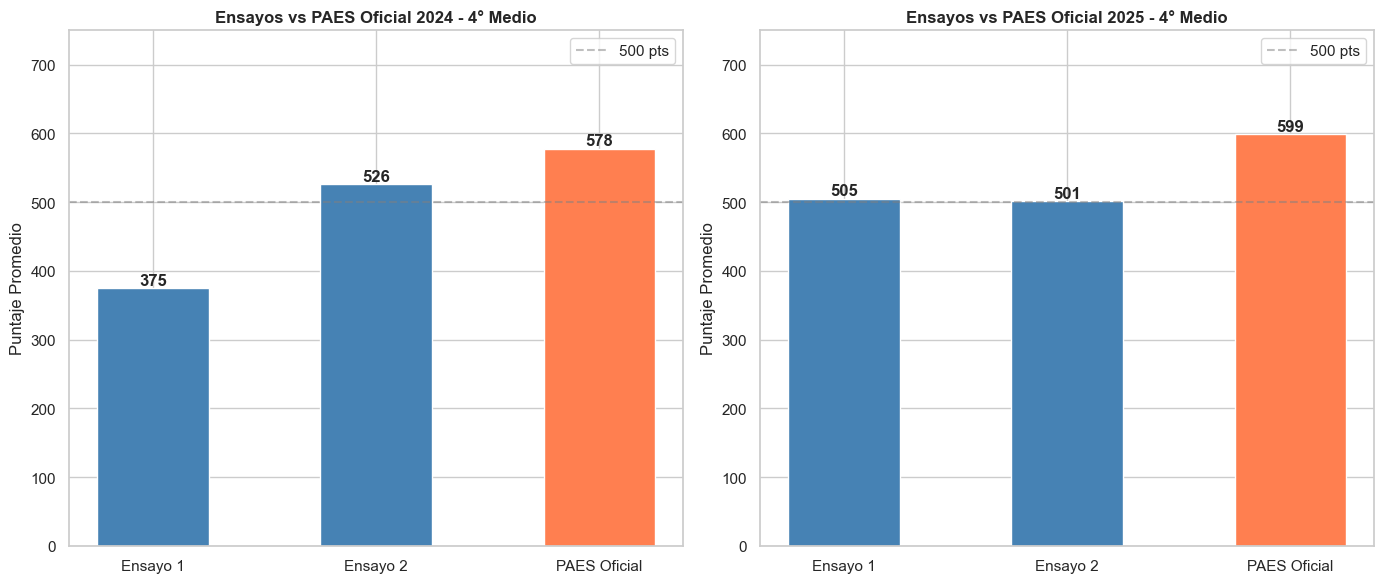

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, año in enumerate([2024, 2025]):
    df_4to = df_ensayos[(df_ensayos['Año']==año) & (df_ensayos['Curso'].isin(['4A','4B']))]
    prom_e1 = df_4to['Ensayo1'].mean().round(1)
    prom_e2 = df_4to['Ensayo2'].mean().round(1)
    prom_oficial = df_oficial[df_oficial['AÑO']==año]['M1'].mean().round(1)

    print(f'\n📊 Año {año} - 4° Medio:')
    print(f'   Ensayo 1: {prom_e1} | Ensayo 2: {prom_e2} | PAES Oficial: {prom_oficial}')

    valores = [prom_e1, prom_e2, prom_oficial]
    etiquetas = ['Ensayo 1', 'Ensayo 2', 'PAES Oficial']
    colores = ['steelblue', 'steelblue', 'coral']
    bars = axes[idx].bar(etiquetas, valores, color=colores, width=0.5)
    for bar, val in zip(bars, valores):
        axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{val:.0f}', ha='center', fontsize=12, fontweight='bold')
    axes[idx].axhline(500, color='gray', linestyle='--', alpha=0.5, label='500 pts')
    axes[idx].set_title(f'Ensayos vs PAES Oficial {año} - 4° Medio', fontweight='bold')
    axes[idx].set_ylabel('Puntaje Promedio')
    axes[idx].set_ylim(0, 750)
    axes[idx].legend()

plt.tight_layout()
plt.show()

## 📉 Tendencia Histórica PAES Oficial

In [ ]:
promedios_año = df_oficial.groupby('AÑO')['M1'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(promedios_año['AÑO'], promedios_año['M1'], marker='o', color='steelblue', linewidth=2, markersize=8)
for _, row in promedios_año.iterrows():
    ax.text(row['AÑO'], row['M1'] + 8, f"{row['M1']:.0f}", ha='center', fontsize=10, fontweight='bold')
ax.fill_between(promedios_año['AÑO'], promedios_año['M1'], alpha=0.1, color='steelblue')
ax.axhline(500, color='gray', linestyle='--', alpha=0.5, label='500 pts referencia')
ax.set_title('Tendencia Histórica PAES Matemática (2022-2025)', fontsize=13, fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Puntaje Promedio')
ax.set_xticks(promedios_año['AÑO'])
ax.set_ylim(400, 750)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📝 Conclusiones

### Evolución histórica PAES oficial
- El promedio PAES del establecimiento muestra una **tendencia creciente sostenida** desde 2022 a 2025.
- El año 2025 registró el promedio más alto con **~599 puntos**, superando en más de 76 puntos al promedio de 2022.

### Ensayos internos 2024 vs 2025
- Los ensayos internos muestran una mejora significativa entre generaciones.
- El Ensayo 2 de 2024 mostró una mejora notable respecto al Ensayo 1, lo que evidencia el impacto de las estrategias aplicadas durante el año.

### Ensayos vs resultado oficial
- Los ensayos internos funcionaron como herramienta predictiva válida del resultado final PAES.
- La mejora sostenida entre ensayos y en resultados oficiales respalda el impacto positivo de las estrategias pedagógicas implementadas.

> **Este análisis fue realizado con datos reales del establecimiento educacional, combinando resultados históricos oficiales PAES y evaluaciones internas 2024-2025.**